In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\PMLS\Downloads\archive (2)\StudentsPerformance.csv")

# Check structure
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed!")

# Check data types
print("\nData types:\n", df.dtypes)

# Optional: Rename columns for easier access
df.rename(columns={
    "parental level of education": "parent_education",
    "test preparation course": "test_prep",
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"
}, inplace=True)

# Preview cleaned data
df.head()


Missing values in each column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Number of duplicate rows: 0

Data types:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


,gender,race/ethnicity,parent_education,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


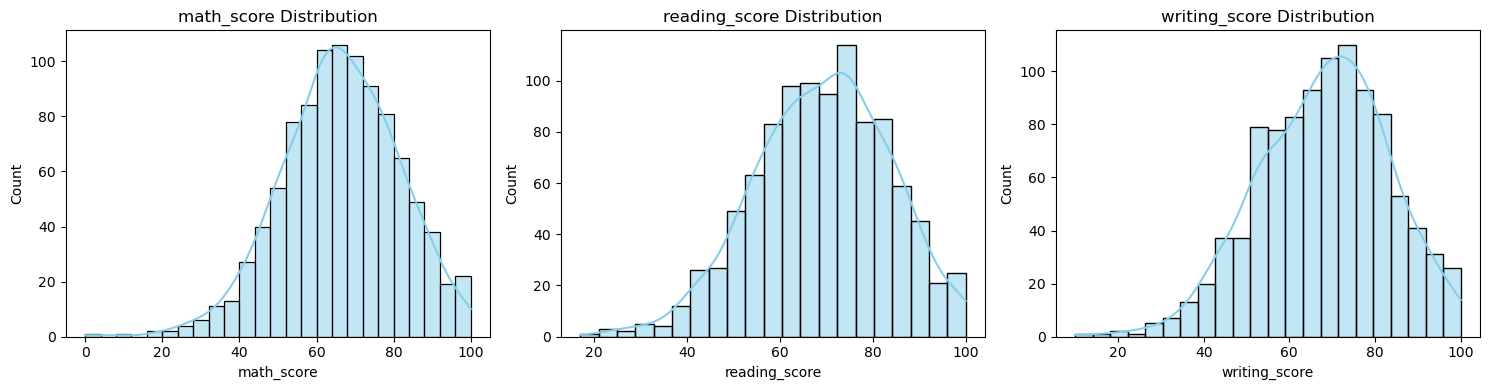

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print(df.describe())

# Distribution plots for each score
plt.figure(figsize=(15, 4))
for i, col in enumerate(["math_score", "reading_score", "writing_score"], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()


Average scores by gender:
         math_score  reading_score  writing_score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


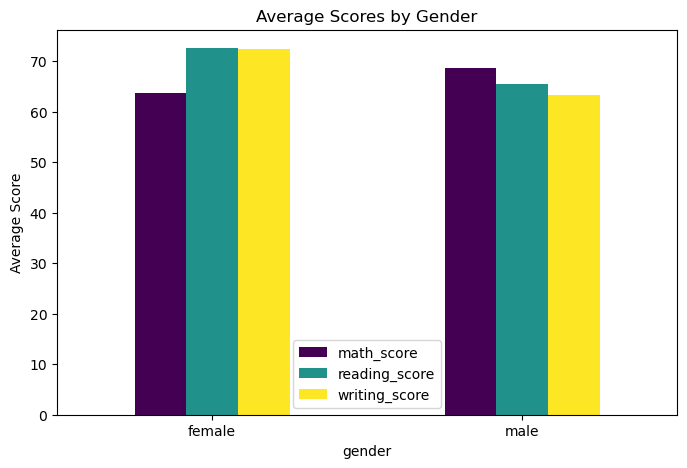


Average scores by lunch type:
               math_score  reading_score  writing_score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


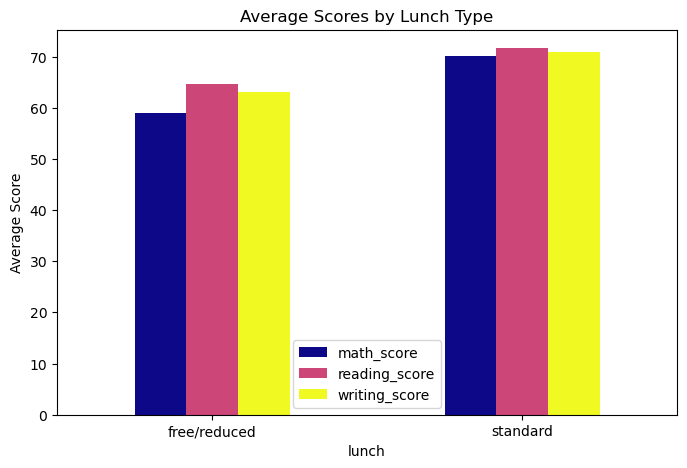


Average scores by test preparation course:
            math_score  reading_score  writing_score
test_prep                                          
completed   69.695531      73.893855      74.418994
none        64.077882      66.534268      64.504673


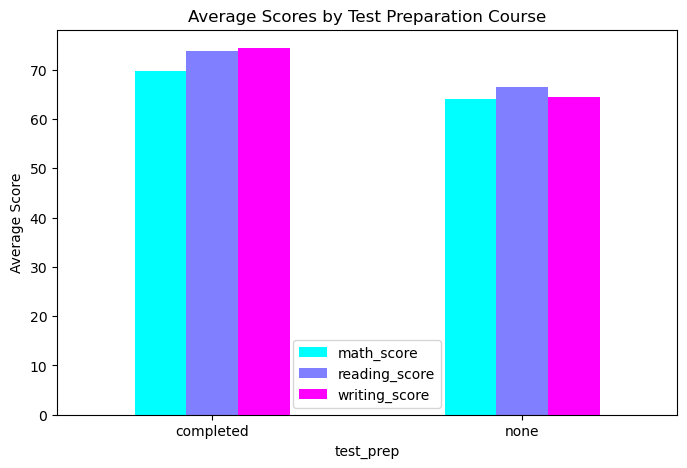

In [6]:
# Average scores by gender
gender_scores = df.groupby("gender")[["math_score", "reading_score", "writing_score"]].mean()
print("Average scores by gender:\n", gender_scores)

# Plot average scores by gender
gender_scores.plot(kind='bar', figsize=(8,5), colormap="viridis")
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

# Average scores by lunch type
lunch_scores = df.groupby("lunch")[["math_score", "reading_score", "writing_score"]].mean()
print("\nAverage scores by lunch type:\n", lunch_scores)

lunch_scores.plot(kind='bar', figsize=(8,5), colormap="plasma")
plt.title("Average Scores by Lunch Type")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

# Average scores by test preparation course
prep_scores = df.groupby("test_prep")[["math_score", "reading_score", "writing_score"]].mean()
print("\nAverage scores by test preparation course:\n", prep_scores)

prep_scores.plot(kind='bar', figsize=(8,5), colormap="cool")
plt.title("Average Scores by Test Preparation Course")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()


Correlation Matrix:
                math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000


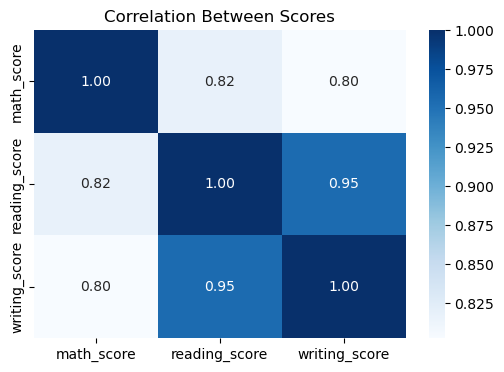

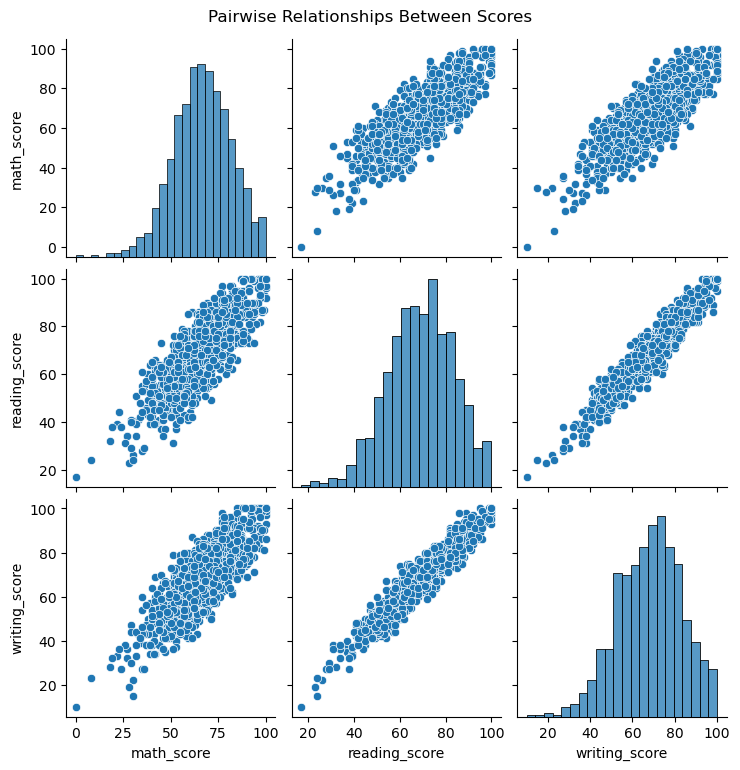

In [7]:
# Correlation matrix
corr = df[["math_score", "reading_score", "writing_score"]].corr()
print("Correlation Matrix:\n", corr)

# Heatmap of correlations
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Between Scores")
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df[["math_score", "reading_score", "writing_score"]])
plt.suptitle("Pairwise Relationships Between Scores", y=1.02)
plt.show()


In [8]:
# Create a new column: average score
df["average_score"] = df[["math_score", "reading_score", "writing_score"]].mean(axis=1)

# Determine the cutoff for the top 5%
cutoff = df["average_score"].quantile(0.95)
print(f"Top 5% cutoff score: {cutoff}")

# Select top 5% students
top_students = df[df["average_score"] >= cutoff]
print(f"Number of top-performing students: {len(top_students)}")
top_students.head()


Top 5% cutoff score: 90.01666666666665
Number of top-performing students: 50


,gender,race/ethnicity,parent_education,lunch,test_prep,math_score,reading_score,writing_score,average_score
2,female,group B,master's degree,standard,none,90,95,93,92.666667
6,female,group B,some college,standard,completed,88,95,92,91.666667
104,male,group C,some college,standard,completed,98,86,90,91.333333
106,female,group D,master's degree,standard,none,87,100,100,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667


C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

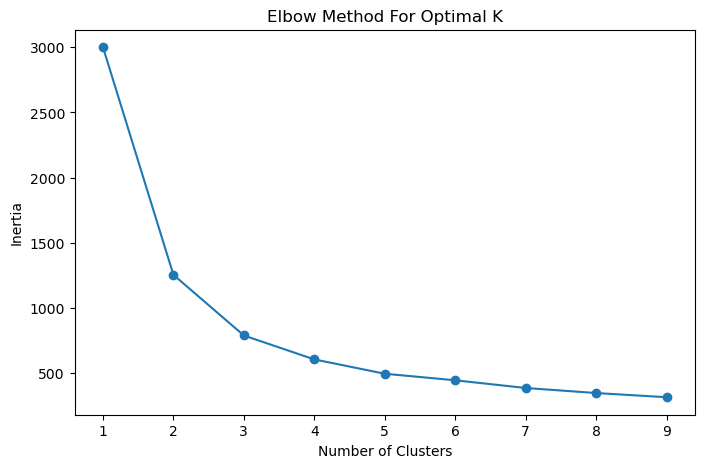

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Cluster sizes:
 PerformanceCluster
0    443
2    308
1    249
Name: count, dtype: int64


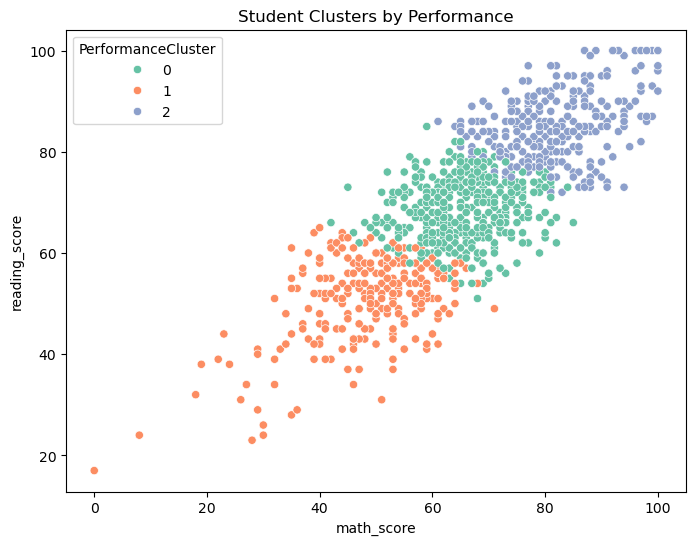

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select only the scores for clustering
X = df[["math_score", "reading_score", "writing_score"]]

# Scale the data (K-Means works better on scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# From the elbow chart, choose k (usually around the 'bend', e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df["PerformanceCluster"] = kmeans.fit_predict(X_scaled)

# Show cluster sizes
print("Cluster sizes:\n", df["PerformanceCluster"].value_counts())

# Visualize clusters (math vs reading, colored by cluster)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["math_score"], y=df["reading_score"], hue=df["PerformanceCluster"], palette="Set2")
plt.title("Student Clusters by Performance")
plt.show()


In [10]:
# Average math score by parental education
parent_math = df.groupby("parent_education")["math_score"].mean().sort_values(ascending=False)
print("Average math score by parental education:\n", parent_math)

# Top parental education level
top_parent = parent_math.idxmax()
print(f"\nHighest average math score is linked with: {top_parent}")


Average math score by parental education:
 parent_education
master's degree       69.745763
bachelor's degree     69.389831
associate's degree    67.882883
some college          67.128319
some high school      63.497207
high school           62.137755
Name: math_score, dtype: float64

Highest average math score is linked with: master's degree


In [11]:
# Top 10% cutoff based on average score
top10_cutoff = df["average_score"].quantile(0.90)

# Students in top 10%
top10 = df[df["average_score"] >= top10_cutoff]

# Group by gender, lunch, and test prep
combo = top10.groupby(["gender", "lunch", "test_prep"]).size().sort_values(ascending=False)
print("Top 10% score combinations:\n", combo)


Top 10% score combinations:
 gender  lunch         test_prep
female  standard      none         31
                      completed    29
male    standard      completed    20
                      none          9
female  free/reduced  completed     6
male    free/reduced  completed     3
female  free/reduced  none          2
male    free/reduced  none          2
dtype: int64


Impact of lunch by race/ethnicity:
                              math_score  reading_score  writing_score
race/ethnicity lunch                                                 
group A        free/reduced   55.222222      60.555556      57.194444
               standard       65.981132      67.471698      66.396226
group B        free/reduced   57.434783      63.971014      61.521739
               standard       66.884298      69.280992      67.925620
group C        free/reduced   56.412281      63.412281      61.412281
               standard       68.941463      72.268293      71.395122
group D        free/reduced   61.115789      66.431579      66.452632
               standard       70.916168      72.077844      72.245509
group E        free/reduced   66.560976      68.731707      67.195122
               standard       76.828283      74.808081      73.151515


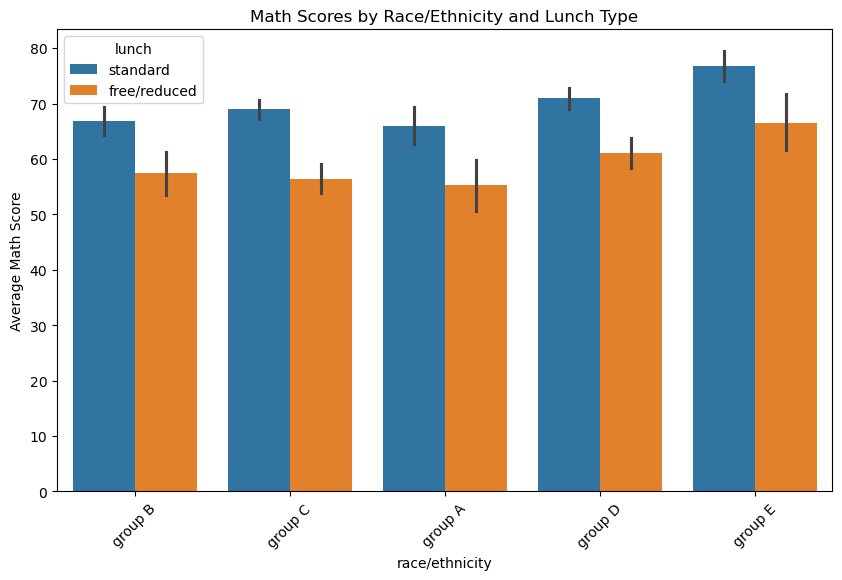

In [12]:
# Average score by lunch within each race/ethnicity group
lunch_race = df.groupby(["race/ethnicity", "lunch"])[["math_score", "reading_score", "writing_score"]].mean()

print("Impact of lunch by race/ethnicity:\n", lunch_race)

# Plot for math score differences
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="race/ethnicity", y="math_score", hue="lunch")
plt.title("Math Scores by Race/Ethnicity and Lunch Type")
plt.ylabel("Average Math Score")
plt.xticks(rotation=45)
plt.show()


In [13]:
# Already identified top_students (top 5%)
top_demo = top_students.groupby(["gender", "race/ethnicity", "parent_education", "lunch", "test_prep"]).size().sort_values(ascending=False)
print("Demographic patterns in top 5% performers:\n", top_demo.head(10))


Demographic patterns in top 5% performers:
 gender  race/ethnicity  parent_education    lunch     test_prep
female  group E         associate's degree  standard  none         3
        group B         associate's degree  standard  completed    2
male    group C         bachelor's degree   standard  completed    2
female  group C         bachelor's degree   standard  completed    2
        group D         master's degree     standard  none         2
        group E         associate's degree  standard  completed    2
        group C         some college        standard  completed    2
male    group C         associate's degree  standard  completed    2
female  group E         master's degree     standard  completed    2
        group C         associate's degree  standard  completed    1
dtype: int64


In [14]:
# Using quantiles for 3 categories
df["PerformanceCategory"] = pd.qcut(df["average_score"], q=3, labels=["Low", "Medium", "High"])

# Show category distribution
print("Performance Category Distribution:\n", df["PerformanceCategory"].value_counts())

# Average scores by category
print("\nAverage scores per category:\n", df.groupby("PerformanceCategory")[["math_score", "reading_score", "writing_score"]].mean())


Performance Category Distribution:
 PerformanceCategory
Low       336
Medium    332
High      332
Name: count, dtype: int64

Average scores per category:
                      math_score  reading_score  writing_score
PerformanceCategory                                          
Low                   50.934524      53.333333      51.559524
Medium                66.442771      69.849398      69.213855
High                  81.072289      84.515060      83.587349


C:\Users\PMLS\AppData\Local\Temp\ipykernel_13588\1872418597.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nAverage scores per category:\n", df.groupby("PerformanceCategory")[["math_score", "reading_score", "writing_score"]].mean())
